<a href="https://colab.research.google.com/github/LeeHyunWoo2/AIStudy24/blob/main/20_%EC%88%9C%EC%B0%A8%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 마켓이 AI를 이용해서 많은 부분이 개선되었고 이벤트도 성공저긍로 결론이 나왔다.

그런데 요즘 상품에 대한 댓글 이슈가 있어서 댓글을 보고 좋은 상품인지 개선해야될 상품인지를 분석하고 싶어 한다. (별점이슈)

댓글을 분석하는 기법을 연구 해보자.

In [35]:
# 순차 데이터 (Sequential Data)는 텍스트나 시계열 데이터(time series data : 일정 시간 간격으로 기록한 데이터) 와 같이
# 순서에 의미가 있는 데이터를 말함

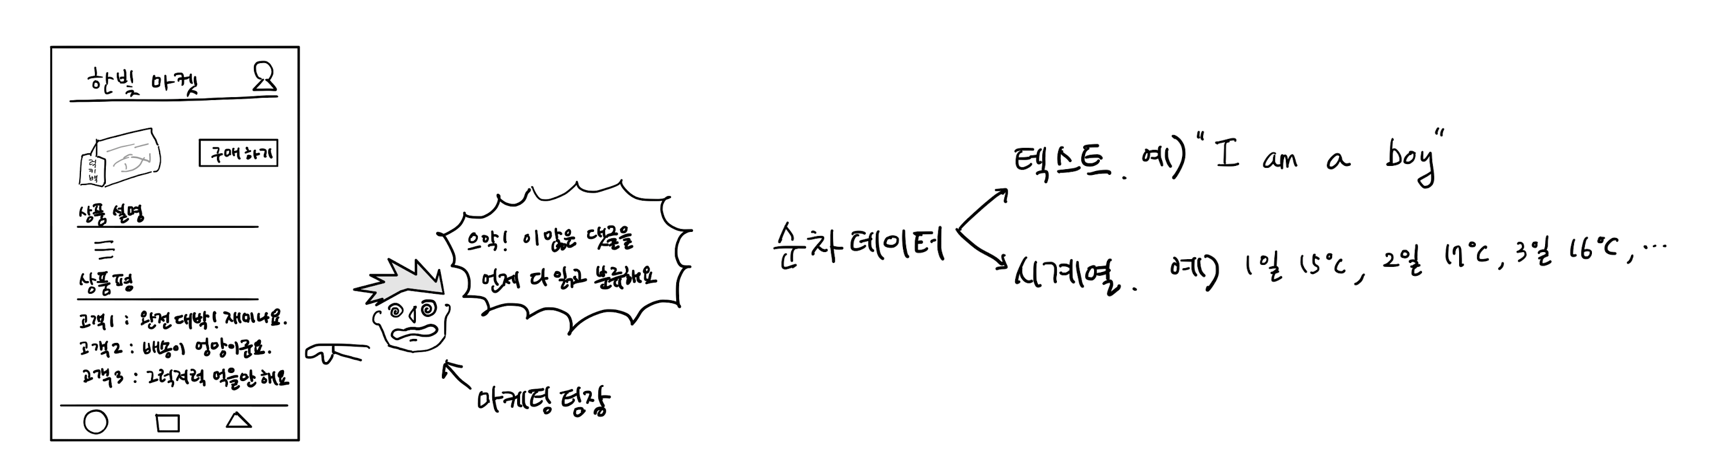

In [36]:
# 지금까지는 순서와 상관이 없었으며 샘플을 랜덤하게 섞은 다음 훈련세트와 검증세트로 나누어 훈련하면 결과가 더 좋았음
# 생선 데이터나 패션 데이터도 어떤 샘플이 먼저 주입되어도 모델의 학습에 큰 영향이 없다.

# 지금 학습하려는 것은 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터임
# 이런 데이터는 순서를 유지하며 신경망에 주입을 해야 한다. (단어의 순서를 마구 섞어 주입하면 안됨)
# 따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요함
# 예를 들어 "별로지만 추천해요" -> "추천해요"가 입력될때 "별로지만" 을 기억하고 있어야 이 댓글을 파악할 수 있음 -> 무조건 긍정적이지 않음

In [37]:
# 완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. (피드포워드 신경망에는 메모리가 없다)
# 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다.
# 피드포워드(순방향) 신경망 : 입력 데이터의 흐름이 앞으로만 전달되는 신경망(FNN: feed-forward neural networks) -> 완전연결 신경망, 합성곱 신경망
# 신경망이 이전에 처리했던 샘플을 다른 샘플로 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로 전달되어서는 안됨
# 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있다 -> 순환신경망

In [38]:
# 순환신경망(Recurrent Neural Network, RNN)은 일반적으로 완전 연결 신경망과 거의 비슷함
# 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나망 추가하면 됨
# 은닉층에 있는 붉은 고리가 핵심

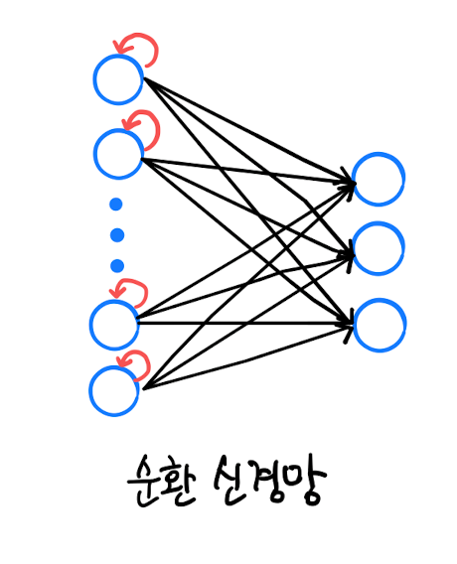

In [39]:
# 뉴런의 출력이 다시 자기 자신으로 전달 됨
# 즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용함
# 아래 그림처럼 A, B, C 3개의 샘플을 처리하는 순환 신경망 뉴런이 있다.
# O는 출력된 결과로 첫 번째 샘플을 처리하고 난 출력 O_A가 다시 뉴런으로 들어감 -> A에 대한 정보가 들어 있음
# B를 처리할 때 앞에 A를 사용해 만든 출력 0_A를 함께 사용함
# 마지막까지 돌리면 O_C는 A, B, C의 정보가 담겨 있다.
# 물론 O_C는 A에 대한 정보보다는 B에 대한 정보가 더 많이 들어 있다.

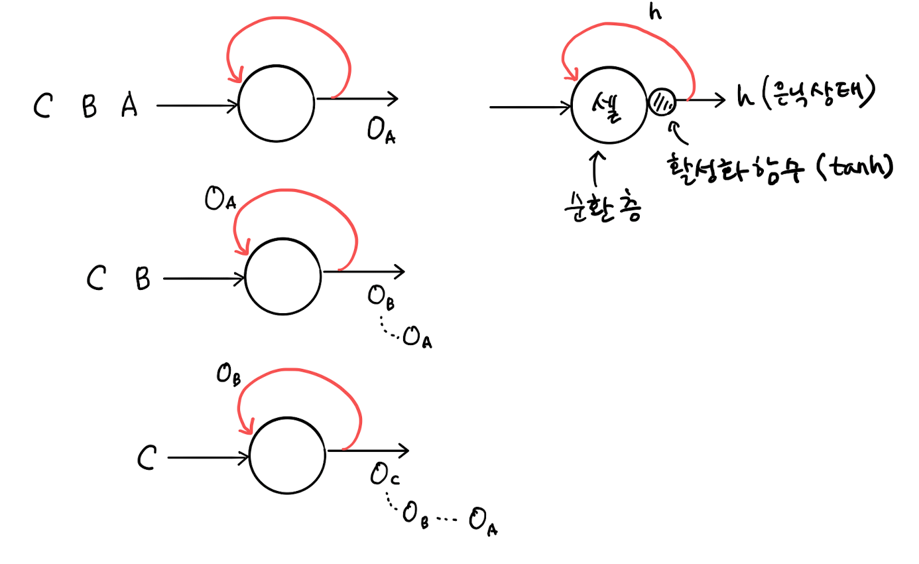

In [40]:
# 그래서 순환 신경망에서는 이전 샘플에 대한 기억을 가지고 있다. 가 됨!
# 이렇게 샘플을 처리하는 한 단계를 타임스탭(timestep)이라고 함

In [41]:
# 순환 신경망에서는 특별히 층을 셀(cell)이라고 함
# 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현함
# 셀의 출력을 은닉 상태(hidden state)라고 함

# 합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있음. 하지만 기본 구조는 같다.
# 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보낸다.
# 달라지는 것은 층의 출력(즉 은닉 상태)을다음 타임 스텝에 재사용 한다는 것!!!

# 일반 적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh : 텐h )함수가 많이 사용됨
# tanh 함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. (차이점 : -1 ~ 1 사이의 범위를 가짐)

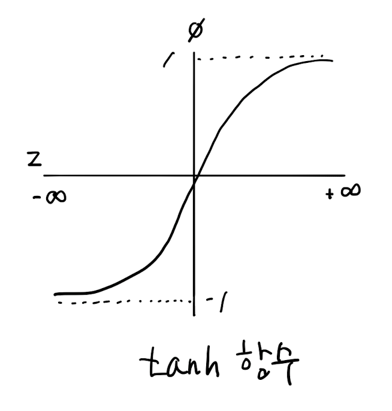

In [42]:
# 다른 신경망 함수와 마찬가지로 순환 신경망 그램에도 번거로움을 피하기 위해 활성화 함수를 표시하지 않는 경우가 많다.
# 하지만 순환 신경망에도 활성화 함수가 반드시 필요하다는 것은 기억할 것

# 합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일 함
# 다만 순환 신경망의 뉴런은 가중치가 하나 더 있다. 바로 이전 타임스템의 은닉 상태에 곱해지는 가중치임
# 셀은 입력과 이전 타임스템의 은닉 상태를 사용하여 현재 타입스텝의 은닉 상태를 만듬

# 아래 그림에서 2개의 가중치를 셀 안에 구분해서 표시를 하였음
# W_x는 입력에 곱해지는 가중치이고 W_h는 이전 타입스텝의 은닉 상태에 곱해지는 가중치임
# 피드포워드 신경망과 마찬가지로 뉴런 마다 하나의 절편이 포함됨

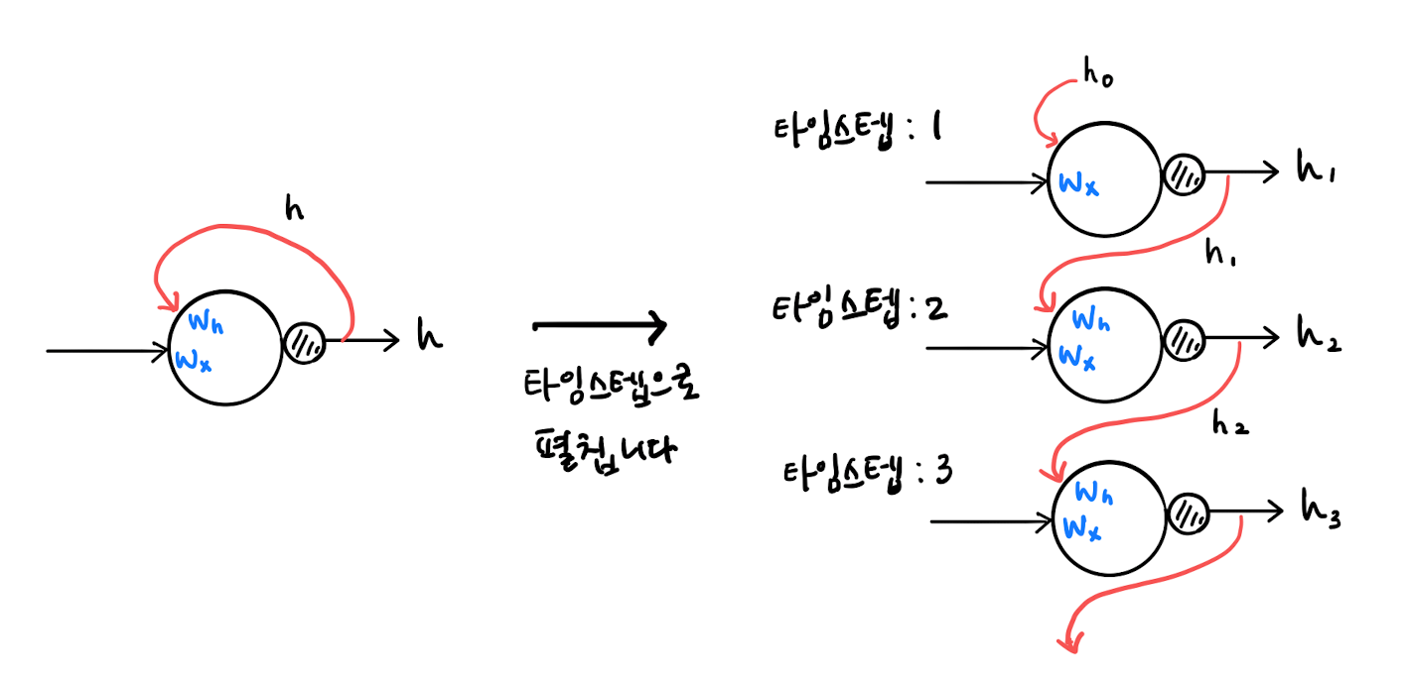

In [43]:
# 셀의 출력(은닉 상태)이 다음 타임스텝에 재사용되기 때문에 타임스템으로 셀을 나누어 그릴 수 있다.
# 위 오른쪽 그림을 셀을 타임스텝으로 펼치는 과정임
# 타임스텝 1에서 셀의 출력 h_1이 타임스텝 2의 셀로 주입되고 W_h와 곱해진다.
# 타임스텝 2에서 셀의 출력 h_2이 타임스텝 3의 셀로 주입되고 W_h와 곱해진다. -> 타입스텝의 가중치는 W_h 하나임
# W_h는 타임스텝에 따라 변화되는 뉴런의 출력을 학습한다. -> 순차 데이터를 다루는데 필요

# 그럼 맨 처음 타임스텝 1에서 사용되는 이전 은닉 상태 h_0은 없기때문에 0으로 초기화하여 구한다.

In [44]:
# 셀의 가중치와 입출력

# 순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보자. 복잡한 모델을 배울 수록 가중치 개수를 계산해 보면 잘 이해 될 수 있다.
# 예를 들어 아래 그림처럼 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 해보자.
# W_x의 크기를 구해보면, 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 W_x의 크기는 4*3 = 12가 됨 (완전 연결 신경망의 입력층과 은닉층의 연결과 같다.)
# 그럼 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 W_h의 크기는 아래 오른쪽 그림을 참고 하자.

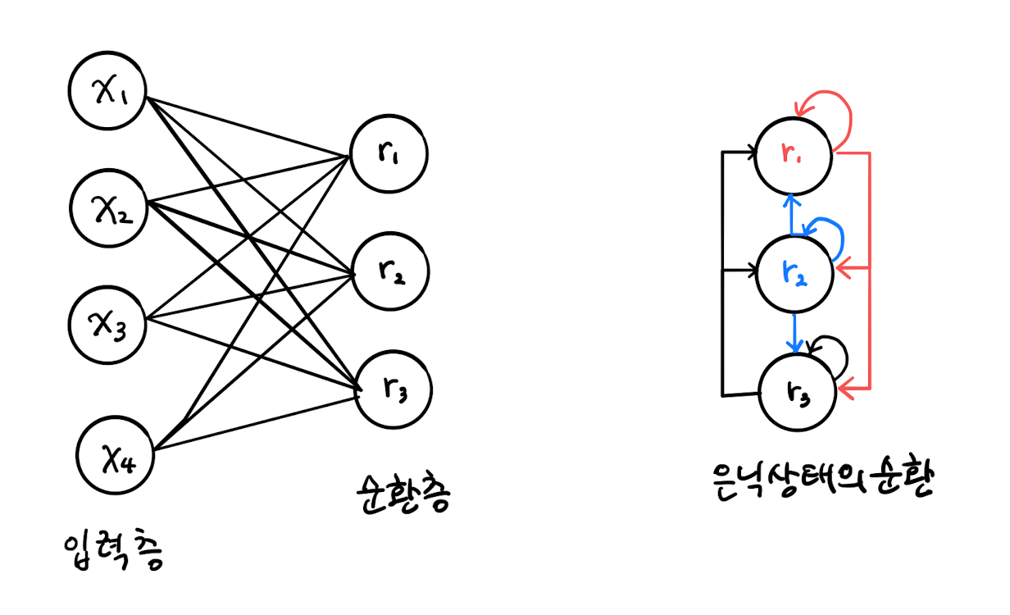

In [45]:
# 순환층에 있는 첫 번째 뉴런(r_1)의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달 됨
# 위에 오른쪽 그림에 빨간 부분을 참고 (즉 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됨)

# 두 번째 뉴런의 은닉 상태도 마찬가지로
# 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고(파란화살표)
# 세 번째 뉴런의 은닉상태도 동일함(검은화살표)
# 따라서 이 순환층에서 은닉 상태를 위한 가중치 w_h (9 = 3 * 3)

# 모델 파라미터 계산 : 가중치에 절편을 더함 ( w_x + w_h + 절편)
# 각 뉴런마다 하나의 절편이 있다.
# 따라서 이 순환층은 모두 12 + 9 + 3 = 24 의 모델 파라미터를 가지고 있다.

In [46]:
# 순환층의 입력과 출력에 대해 알아보자.

# 합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원을 가짐 (너비, 높이, 채널)
# 입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널(깊이)의 크기가 달라지지만 차원의 개수는 그대로 유지됨

# 순환층은 일반적으로 샘플마다 2개의 차원을 가짐, 보통 하나의 샘플을 하나의 스퀀스라고 말함
# 스퀀스 안에는 여러 개의 아이템들이 들어 있는데 여기에서 시퀀스의 길이가 바로 타임스텝 길이가 됨

# 샘플에 I am a boy 라는 문장이 들어 있다고 가정 하고 분석 해보자.
# 이 샘플은 4개의 단어로 이루어 짐, 각 단어를 3개의 어떤 숫자로 표현한다고 해보면???

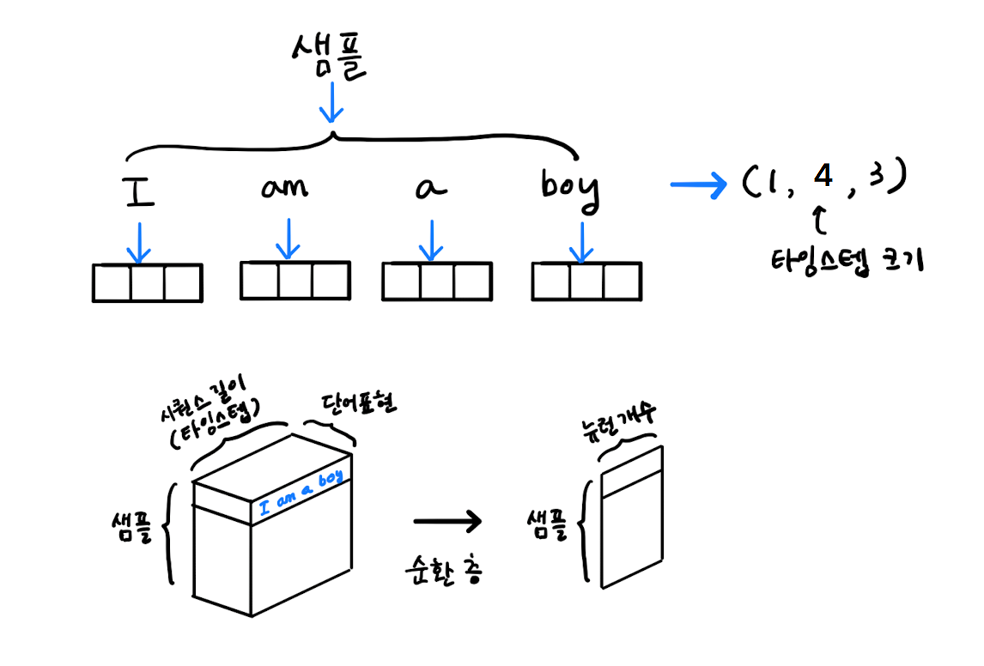

In [47]:
# 순환 신경망 실습
# IMDB 리뷰 데이터 셋 : 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터 셋
# 총 50,000개의 샘플로 훈련데이터와 테스트데이터가 5:5로 나누어져 있음

# 자연어 처리(natural language processing : nlp) : 컴퓨터를 사용해 인간의 언어를 처리하는 분야(음성인식, 기계번역, 감정분석)
# 말뭉치(corpus : 코퍼스) : 자연어 처리 분야에서 훈련데이터를 말함 (IMDB 리뷰 데이터셋이 이에 해당 )

# 텍스트 자체를 신경망에 전달하지 않음. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다.
# 합성곱 신경망에서 이미지를 다룰때 특별한 변환을 하지 않았음 (RGB), 이미지가 정수 픽셀 값으로 이루어져 있기 때문이다.
# 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여한다.

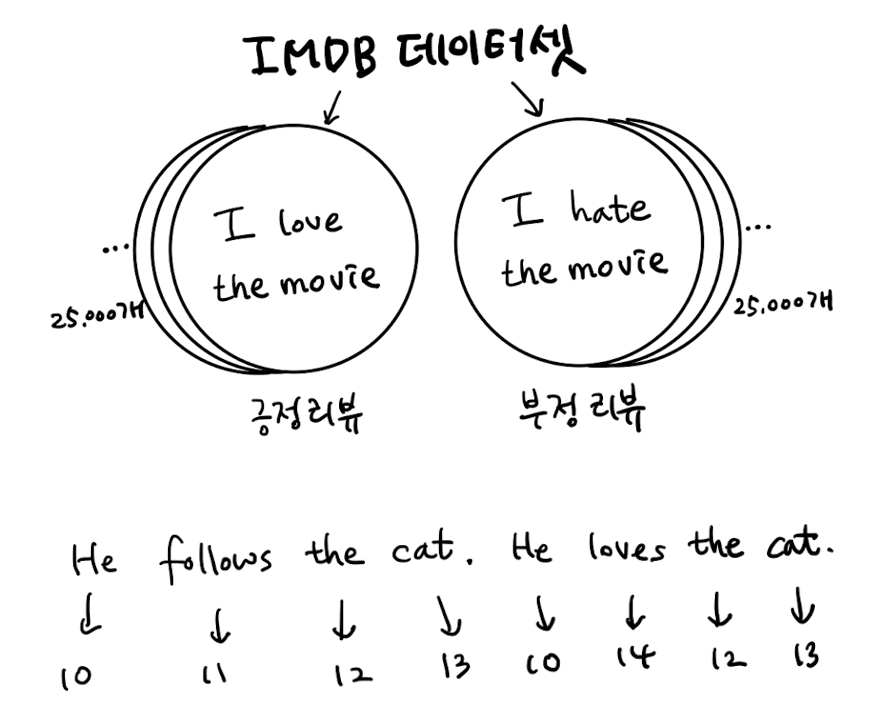

In [1]:
# 앞의 두문장에 등장하는 각 단어를 하나의 정수에 매핑, 동일한 단어는 동일한 정수에 매핑됨
# 단어의 매핑되는 정수는 단어의 의미나 크기와 관련이 없다.
# 위에 그림에 보면 He 를 10으로 매핑, cat을 13에 매핑하더라도 cat이 He 보다 좋거나 크다는 뜻이 아님
# 이 정숫 값 사이에는 어떤 관계도 없음

# 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점(.,)을 삭제한 다음 공백을 기준으로 분리한다.
# 이렇게 분리된 단어를 토큰(token)이라고 부른다.

# 하나의 샘플은 여러개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스텝에 해당한다.
# 간단한 문제라면 영어 말뭉치에서 토큰을 단어와 같게 봐도 됨(한국어는 조금 다름)
# 한국어인 경우에는 조사가 발달 되어 공백으로 나누는 것보다 형태소 분석을 통해 토큰을 만듬
# https://velog.io/@hunterhunter/%ED%95%9C%EA%B5%AD%EC%96%B4-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D-%EA%B8%B0%EC%B4%88

# 토큰에 할당하는 정수 중에 몇개는 특정한 용도로 예약 되어 있다.
# 예를 들어 0은 패딩, 1은 문장의시작 , 2는 어휘 사전에 없는 토큰을 나타냄
# 어휘사전 : 훈련세트에서 고유한 단어를 뽑아 만든 목록(테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2를 변환하여 신경망 모델에 주입함)

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [2]:
# 실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있다.
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)
# 전체 데이터 셋에서 가장 자주 등장하는 단어 200개만 사용 하겠다. (num_words=200) -> 학생은 300으로 테스트 해봄

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_input.shape, test_input.shape) # 훈련세트와 테스트 세트의 크기 확인

(25000,) (25000,)


In [51]:
# 데이터 셋은 5만개 있으며 5:5로 나누어 져 있음, 배열이 1차원인 것이 확인됨
# IMDB 리뷰 텍스트는 길이가 제각각으로 되어 있다. 그래서 고정 크기의 2차원 배열에 담기보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음
# 아래 그림처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파일 배열이다.(넘파일 배열은 정수,실수외에도 파이썬 객체도 담음)

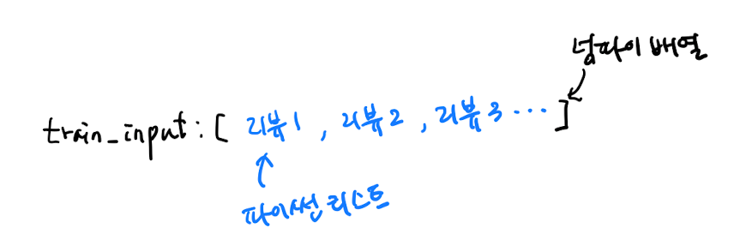

In [4]:
# 0번에 있는 데이터를 출력 해보자.
print(len(train_input[0])) # 218개의 토큰으로 되어 있음

218


In [5]:
# 1번에 있는 데이터를 출력 해보자.
print(len(train_input[1])) # 189개의 토큰으로 되어 있음

189


In [6]:
# 리뷰마다 각각 길이가 다름, 여기서 하나의 리뷰가 하나의 샘플이 됨
# 첫번째 리뷰에 담긴 내용을 출력 해보자.
print(train_input[0])
# 0은 패딩, 1은 문장의시작 , 2는 어휘 사전에 없는 토큰

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다. 전에 num_words=200으로 지정했음으로 어휘 사전에 200개 단어만 들어가 있음
# 어휘사전에 없는 단어는 2로 표시됨
# 200개의 단어 기준은 imdb.load_date() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장많이 등장한 200개의 단어를 선택함

print(train_target[:20]) # 타깃 데이터를 출력해보자.
# 긍정(1)인지 부정(0)인지 파악하는 타깃

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
# 해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 것 -> 이진 분류 문제임
# 데이터를 훈련세트에서 검증세트를 떼어 작업을 하자, 원래 훈련세트 크기가 25,000개 임으로 20%를 검증 세트로 떼어 놓으면 훈련세트 크기가 20,000개로 줄어듬
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [9]:
# 훈련세트에 대해서 각 리뷰의 길이를 계산해 넘파일 배열에 담는다.(평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인 할 것!)
# 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하면서 길이를 잼
import numpy as np

lengths = np.array([len(x) for x in train_input]) # lengths 배열이 생성됨 (리뷰의 길이를 담고 있는 배열)
print(np.mean(lengths), np.max(lengths), np.min(lengths), np.median(lengths)) # 평균적인 리뷰의 길이
# 평균, 최대, 최소, 중간값

239.00925 1854 11 178.0


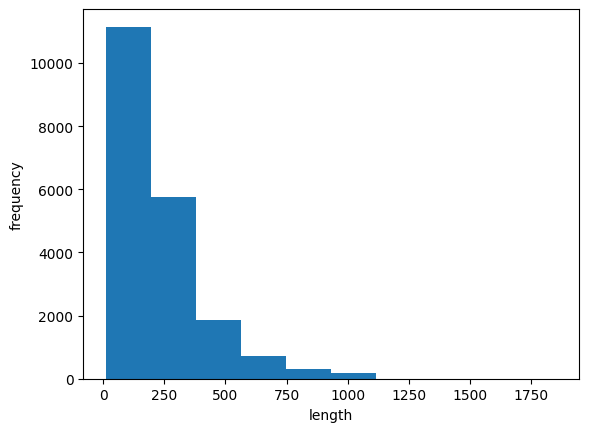

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')  # 길이
plt.ylabel('frequency') # 빈도
plt.show()
# lengths 배열을 히스토그램(막대그래프)로 출력 해봄
# 왼쪽으로 치우침 (글자수 적은 것이 왼쪽, 글자수 많은 곳이 오른쪽)
# 대부분 리뷰길이는 300 이만이고 평균이 중간값보다 높은 이유임
# 1000개 단어이상의 리뷰도 존재함

In [11]:
# 리뷰는 대부분 짧아서 이 예제에서는 중간값보다 휠씬 짧은 100개의 단어만 사용하려한다. (이유는? )
# 하지만 여전히 100개의 단어보다 작은 리뷰가 있다. 이런 리뷰들의 길이를 100에 맞추려면 패딩이 필요함(보통 패딩을 나타내는 토큰으로 0을 사용함)

# 수동으로 훈련세트에 있는 2만개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 0으로 패딩 할 수 있다.
# 하지만 자주 있는 번거로운 작업엔느 항상 편리한 도구가 준비되어 있음
# 케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences() 함수를 제공함
# https://yeko90.tistory.com/entry/keras-how-to-padding-with-padsequences

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100, truncating='pre') # pad_sequences() 사용해 train_input의 길이를 100으로 맞춘다.

In [12]:
lengthspd = np.array([len(x) for x in train_seq]) # lengths 배열이 생성됨 (리뷰의 길이를 담고 있는 배열)
print(np.mean(lengthspd), np.max(lengthspd), np.min(lengthspd), np.median(lengthspd)) # 평균적인 리뷰의 길이

100.0 100 100 100.0


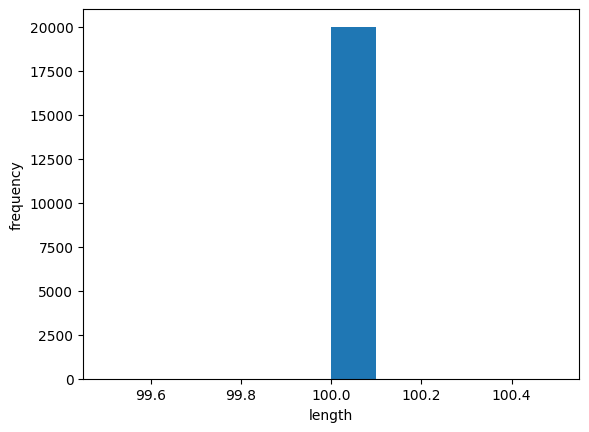

In [13]:
plt.hist(lengthspd)
plt.xlabel('length')  # 길이
plt.ylabel('frequency') # 빈도
plt.show()

In [14]:
print(train_seq.shape) #train_seq 크기 확인
# train_input은 파이선 리스트 배열이었지만 길이를 100으로 맞춘 train_seq는 이제 (20000,100)크기의 2차원 배열이 되었음

(20000, 100)


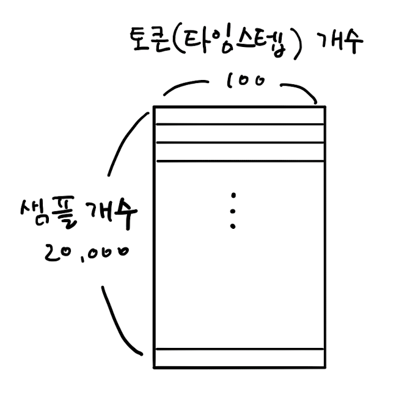

In [15]:
print(train_seq[0]) # 18 * 5 + 10 = 90 + 10 = 100 (앞뒤에 패딩이 없는 것을 봐서는 어디가 잘린 듯??)

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [16]:
print(train_input[0][-10:]) # train_input에 있는 원본 샘플의 끝쪽을 확인 해보자.
# 음수 인덱스와 슬라이싱을 사용해서 마지막 10개를 확인 해보니 앞쪽이 잘림

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [17]:
# pad_sequences() 함수는 기본적으로 maxlen 보다 긴 시퀀스를 가지고 있으면 앞부분을 자름
# 통상적으로 결론은 뒤쪽에 나는 느낌 pad_sequences(truncating='pre')
# 앞쪽을 남기고 뒤쪽을 자르고 싶으면 pad_sequences(truncating ='post')

In [18]:
print(train_seq[5]) # 여섯번째 토큰을 확인 해보면 앞쪽에 0으로 채워짐

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [19]:
val_seq = pad_sequences(val_input, maxlen=100) # 검증 세트 길이도 100으로 맞춤
# 훈련세트 검증세트 준비 완료

In [20]:
# 순환 신경망 만들기

# 케라스는 여러종류의 순환층 클래스를 제공하지만 가장 간단한 SimpleRNN 클래스를 사용해보자.
# IMDB리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용할 것임
from tensorflow import keras

model = keras.Sequential()
# Sequential()클래스는 순환 신경망, 합성곱 신경망, 일반적인 인공 신경망을 모두 만들 수 있음
# 다만 층을 쌓기 때문에 Sequential클래스로 이름을 붙임 (순차 데이터와 관련없음)

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200), activation='tanh'))
# Dense나 Conv2D 클래스 대신 SimpleRNN 클래스를 사용함
# activation='tanh' : 활성화 매개변수 기본이 하이퍼볼릭 탄젠트 함수를 사용함 (생략가능)
# SimpleRNN(뉴런의 개수, 입력차원(샘플의길이,imdb.load_data(num_words=200) )
# input_shape의 두번째 차원인 200에 대한 설명

model.add(keras.layers.Dense(1, activation='sigmoid'))
# 이전 세션에서만든 train_seq와 val_seq 은 한 가지 큰 문제가 있다.
# 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 활성화 출력을 만들기 때문!!!
# 분명히 이 정수 사이에 어떤 관련이 없다. 20번 토큰을 10번 토큰보다 더 중요시해야 할 이유가 없음
# 따라서 단순한 정숫값을 신경망에 입력하기 위해서는 다른 방식을 찾아야 함
# 정수값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법 -> 원-핫인코딩
# 원-핫인코딩 : 정수값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 0으로 변환 (다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위해서 사용함)
# https://wikidocs.net/22647
# train_seq[0]의 첫번째 토큰인 10을 원-핫 인코딩하면 아래와 같은 그림이 됨
# 열한번째 원소만 1이고 나머지는 모두 0인 배열이 되야 됨

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

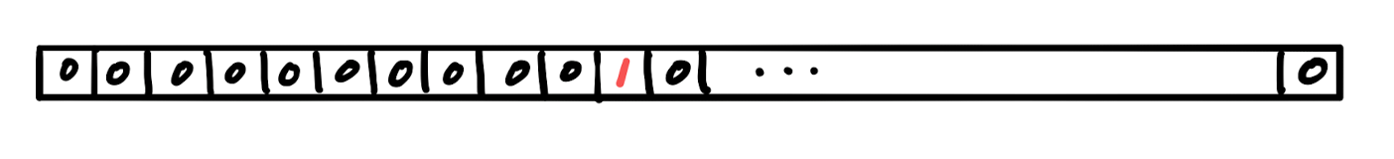

In [21]:
# imdb.load_data(num_words=200)에서 200개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 200개 이다.
# 즉 훈련 데이터에 포함될 수 있는 정수값의 범위는 0(패딩토큰)~199까지 가 됨
# 따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 200이여야 함

# I am a boy에 있는 각 단어를 숫자 3개로 사용해 표현하다고 가정 해보자.
# 토큰마다 200개의 숫자를 사용해 표현하는 것이다. 다만 200개중 하나만 1이고 나머지는 모두 0으로 만들어 정수 사이에 있던 크기 속성을 없앰
# keras.utils.to_categorical 유틸리티가 정수 배열을 입력하면 원-핫 인코딩된 배열을 반환해 줌
train_oh = keras.utils.to_categorical(train_seq) # 원-핫인코딩 변환하여 train_oh 배열어 넣음
print(train_oh.shape) # 배열의 크기를 확인(2만개, 100(뉴런), 200(원-핫))

(20000, 100, 200)


In [22]:
print(train_oh[0][0][:15]) # 첫번째 샘플의 첫번째 토큰 10이 잘 인코딩 되었는지 확인
# 15는 좀더 많이 보게 설정 (11번째 요소가 1일 것 확인)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
print(np.sum(train_oh[0][0])) # 배열에 있는 모든 값을 더해서 1인지 확인

1.0


In [24]:
val_oh = keras.utils.to_categorical(val_seq) # 같은 방식으로 검증도 원-핫 인코딩으로 변경

In [25]:
model.summary()
# SimpleRNN에 전달할 샘플의 크기는 (100,200)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력함
# 이때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인

# 순환층에서 사용된 모델의 파라미터 개수 계산
# 입력토큰 200 차원의 원-핫 인코딩 배열은 순환층의 뉴런8개와 완전히 연결됨 200 * 8 = 1600개의 가중치
# 순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해짐
# 이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉상태크기) * 8(뉴런 개수) = 64개의 가중치가 필요
# 마지막으로 뉴런마다 절편이 존재 -> 1600 + 64 + 8 = 1672

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 순환 신경망 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 학습률 0.0001 지수표현
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, # 조기종료 인내심 5번
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, # 에포크를 100, 배치크기 64
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 체크포인트 조기종료

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4952 - loss: 0.7110 - val_accuracy: 0.4920 - val_loss: 0.7043
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5035 - loss: 0.7026 - val_accuracy: 0.4940 - val_loss: 0.7005
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5071 - loss: 0.6985 - val_accuracy: 0.4966 - val_loss: 0.6980
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5137 - loss: 0.6959 - val_accuracy: 0.5062 - val_loss: 0.6959
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5185 - loss: 0.6938 - val_accuracy: 0.5122 - val_loss: 0.6937
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5218 - loss: 0.6922 - val_accuracy: 0.5106 - val_loss: 0.6923
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5236 - loss: 0.6912 - val_accuracy: 0.5166 - val_loss: 0.6916
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5274 - loss: 0.6903 

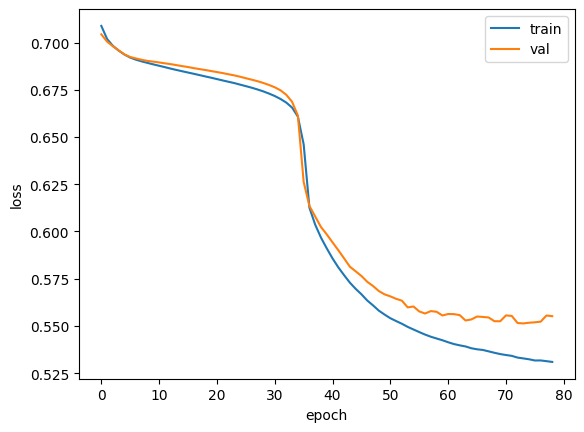

In [28]:
# 70회 에포크에서 조기 종료됨 정확도는 74% 정도 나옴
# 매우 뛰어나진 않지만 감상평을 분류 하기에는 적당할 듯

# 훈련손실과 검증손실 그래프로 나타내 보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [29]:
# keypoint : 이 작업을 위해서 입력 데이터를 원-핫 인코딩을 사용하였음
# 원-핫 인코딩을 단점은 입력 데이터가 엄청 커짐
print(train_seq.nbytes, train_oh.nbytes)
# 토큰 1개를 300차원으로 늘렸기 때문에 썩 좋은 방법은 아님

8000000 3200000000


In [ ]:
# 단어 표현 방법 -> 원-핫인코딩 단점 해결
# 순환 신경망에서 텍스트를 처리 할 때 즐겨 사용하는 방법은 단어 임베딩(word embedding)이다.
# 단어 임베딩은 각 단어를 고정된 크기의 실수 백터로 바꾸어 줌

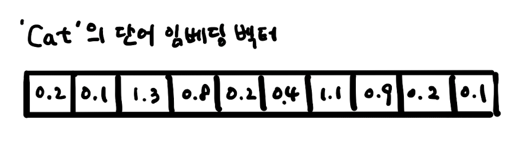

In [30]:
# 이런 단어 임베딩으로 만들어진 벡터는 원-핫인코딩보다 훨씬 의미있는 값으로 채워져 있기 때문에 자연어 처리에서 도 좋은 성능을 냄
# 물론 이런 단어 임베딩 벡터를 만드는 층은 이미 준비되어 있다. keras.layers.Embedding 클래스가 임베딩 기능을 제공
# 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은단어 임베딩 학습을 함
# https://casa-de-feel.tistory.com/28

# 단어 임베딩의 장점은 입력으로 정수 데이터를 받는 다는 것
# 즉 원-핫인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있음 (메모리 관리 유용)

# 전에 샘플 하나를 200 차원으로 늘렸기 때문에 (100,) 크기의 샘플(100,200)으로 커졌음
# 이와 비슷하게 임베딩도 (100,) 크기의 샘플(100,20)과 같이 2차원 배열로 늘림
# 하지만 원-핫 인코딩과 달리 횔씩 작은 크기로도 단어를 잘 표현할 수 있음

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(200, 16, input_shape=(100,)))
# Embedding(어휘사전크기 imdb.load_data(num_words=200) , 임베딩 벡터 크기 16, 입력 시퀀스의 길이 100 )
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# 임베딩 층은 (100,)을 받아 (100,16) 크기의 출력을 만듬
# 파라미터 개수 : 200개의 토큰을 받아 각 토큰크기를 16인 벡터로 변경함 200 * 16 = 3200의 모델 파라미터를 가짐
# SimpleRNN 층은 임베딩 백터의 크기가 16임으로 8개위 뉴럽과 곱하기 위해 16 * 8 = 128개를 가짐
# 은닉상태에서 곱해지는 가중지 8 * 8 = 64 가 있고 절편이 8개 있음  128 + 64 + 8 = 200
# 마지막 층은 가중치 개수는 이전과 동일하게 9 임

# 훈련시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.6314 - loss: 0.6450 - val_accuracy: 0.5550 - val_loss: 0.6874
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6330 - loss: 0.6433 - val_accuracy: 0.5544 - val_loss: 0.6876
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6350 - loss: 0.6419 - val_accuracy: 0.5562 - val_loss: 0.6878
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6363 - loss: 0.6406 - val_accuracy: 0.5588 - val_loss: 0.6881


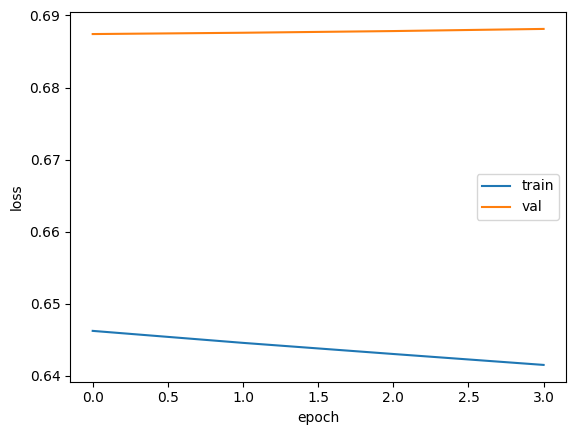

In [36]:
# 4번에 에포크로 조기 종료 63.43% (잘못나온 결과인데 시간상 패스)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 이런 순환 층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력됨
# 하나의 샘플은 시퀀스 길이(여기선 단어 개수)와 단어 표현의 2차원 배열이다.
# 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정됨

# 앞에서 셀의 출력을 설명할 때 참고해야 할 상태가 있다. -> 앞에서는 셀이 모든 타임스텝에서 출력을 만든 것 처럼 표현했다.
# 하지만 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

# 아래 그림에서 이런 특징을 그림으로 표현하기 위해 셀의 출력을 점선으로 표현함
# 또 마지막 타임스텝의 은닉 상태임을 나타내기 위해 아랫첨자 f를 사용함

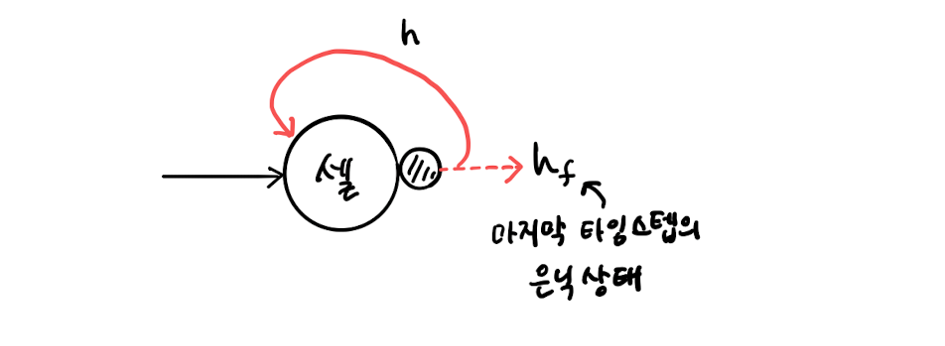

In [ ]:
# 이는 마치 입력된 스퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달 하는 것 처럼 보임

# 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현을 하는 것임 (순환 신경망이 순차 데이터의 최적화 됨)

# 순환 신경망도 완전 연결 신경망이나 합성곱 신경망 처럼 여러 개의 층을 쌓을 수 있다.
# 순환층을 여러 개 쌓았을 때는 셀의 출력은 어떻게 달라질지 알아야 한다.
# 셀의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 한다.

# 따라서 첫 번째 셀이 마지막 타임스텝의 은닉상태만 출력해서는 안됨
# 이런 경우 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉 상태를 출력한다.
# 아래 그림은 2개의 순환층을 쌓은 경우임

# 첫번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두번째 셀은 마지막 타임스텝의 은닉상태만 출력한다.

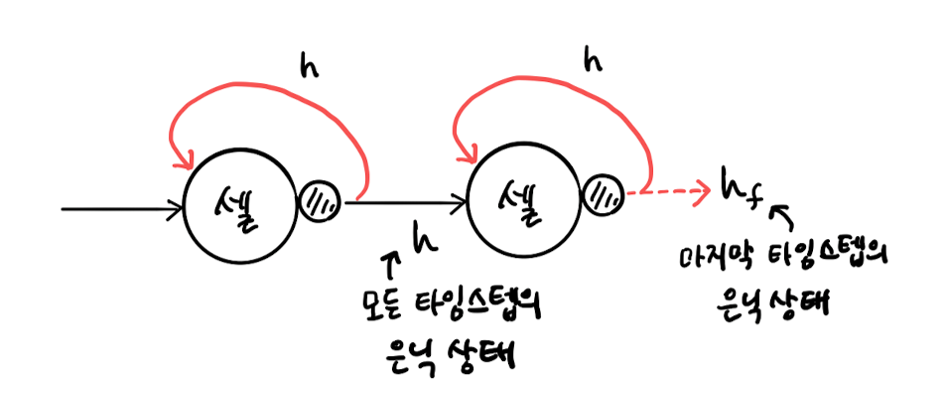

In [ ]:
# 마지막 출력층의 구성은 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다.
# 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용함
# 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용함

# 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요없음
# 셀의 출력을 그대로 밀집층에 사용할 수 있다.

# 예를 들어 다중 분류 문제에서 입력 샘플의 크기가 (20, 100)일 경우 하나의 순환층을 사용하는 순환 신경망 구조는 아래그림을 참고 한다.

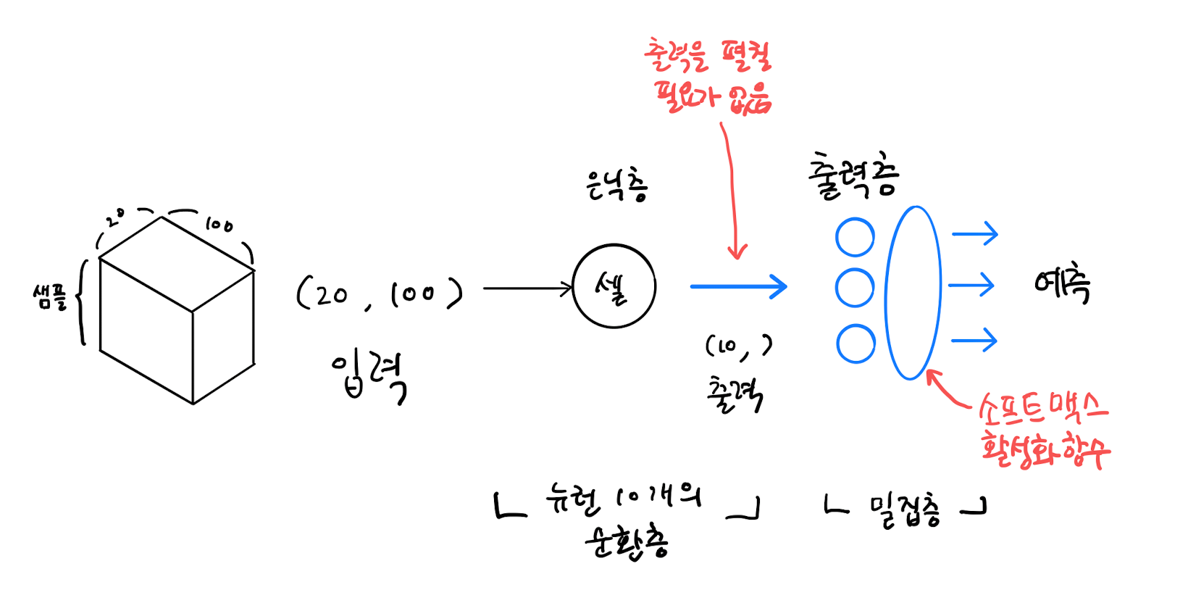

In [ ]:
# 이 예에서 샘플은 20개의 타임스텝으로 이루어져 있음, 또 각 타임스텝은 100개의 표현 또는 특성으로 이루어 져 있음
# 이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉 상태만 출력됨
# 이 은닉 상태의 크기가 셀에 있는 뉴런의 개수가 되므로 (10, )이 된다.

# 샘플마다 셀이 1차원 배열을 출력하기 때문에 합성곱 신경망 처럼 Flatten 클래스로 펼칠 필요 없이 바로 출력층에 연결 함
# 위 그림은 3개의 클래스를 가진 다중 분류일 경우를 위해 출력층에 3개의 뉴런과 소프트맥스 활성 함수를 사용하는 예제임